# Carga Librerias

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from genetic_selection import GeneticSelectionCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

colors= sns.color_palette("mako", 10)

# Carga de Dataset

In [2]:
data = pd.read_csv('../water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Caracterización del dataset 

ph: pH de 1. agua (0 a 14).

Dureza: Capacidad del agua para precipitar jabón en mg/L.

Sólidos: Sólidos disueltos totales en ppm.

Cloraminas: Cantidad de Cloraminas en ppm.

Sulfato: Cantidad de Sulfatos disueltos en mg/L.

Conductividad: Conductividad eléctrica del agua en μS/cm.

Organic_carbon: Cantidad de carbono orgánico en ppm.

Trihalometanos: Cantidad de Trihalometanos en μg/L.

Turbidez: Medida de la propiedad de emisión de luz del agua en NTU.

Potabilidad: Indica si el agua es segura para el consumo humano. Potable - 1 y No potable - 0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.shape

(3276, 10)

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


C:\Users\USUARIO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Potability Count'}, xlabel='Potability', ylabel='count'>

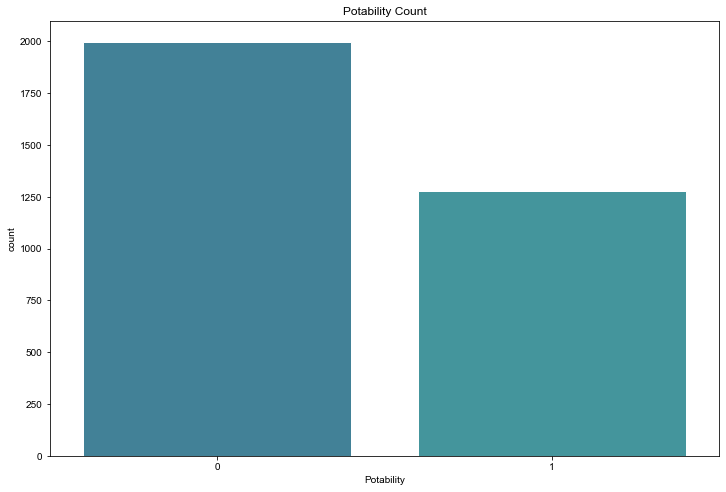

In [6]:
plt.figure(figsize=(12,8))
plt.title('Potability Count')
sns.set_style('dark')
sns.countplot(data['Potability'], palette=colors[5:7]) 

# Indentificación X y Y

En el dataset todas nuestras columnas son importantes ya que como se esta buscando la clasificación de la potabilidad del agua con la no potabilidad de la misma es indispensable seleccionar todas estas columnas (ph, dureza, solidos, cloraminas, sulfato, conductividad, Organic_carbon, Trihalometanos, Turbidez) las cuales serán las variables de entrada o X y para la variable objetivo se toma la columna de potabilidad puesto que esta columna contiene el dato de si el agua es segura o no para el consumo humano.

# Preprocesamiento de datos

In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

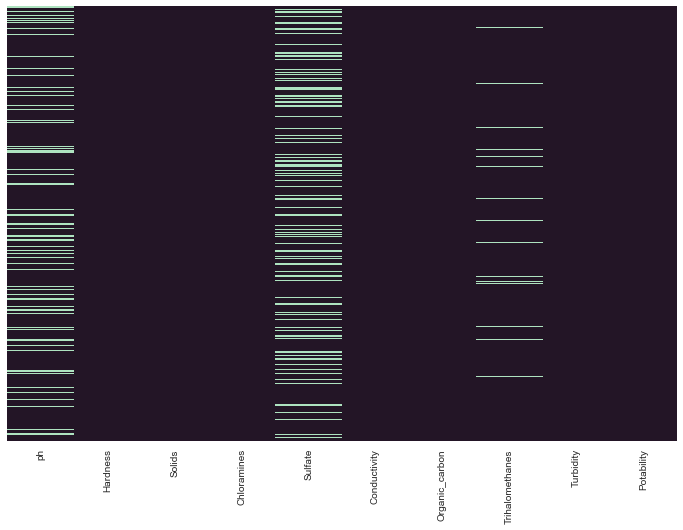

In [8]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap=colors)

### Limpiar

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Dividir X, Y

In [11]:
''' Asignar variable en x; y en y'''

X = data.drop('Potability',axis=1).values
y = data['Potability'].values

''' Dividimos el conjunto de datos en un 70% para el entrenamiento y el otro 30% para la prueba '''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
X_train.shape, X_test.shape

((1407, 9), (604, 9))

In [13]:
y_train.shape, y_test.shape

((1407,), (604,))

### Estandarizar

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Experimento

### Train

In [15]:
clf = svm.SVC(kernel='rbf')

### Algoritmo Genetico

In [16]:
models = GeneticSelectionCV(
    clf, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

models.fit(X_train, y_train)


GeneticSelectionCV(caching=True, crossover_independent_proba=0.5, cv=5,
                   estimator=SVC(), max_features=5,
                   mutation_independent_proba=0.04, n_gen_no_change=10,
                   n_generations=50, n_jobs=-1, n_population=100,
                   scoring='accuracy')

### Testing

In [17]:
''' Predecimos la respuesta para el conjunto de datos de prueba '''
y_pred = models.predict(X_test)

# Metricas del Modelo

In [18]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.7152317880794702
Precision: 0.7368763054072871
Recall: 0.6732054980485321


### Matriz de Confusion

Text(0.5, 16.0, 'Predicted label')

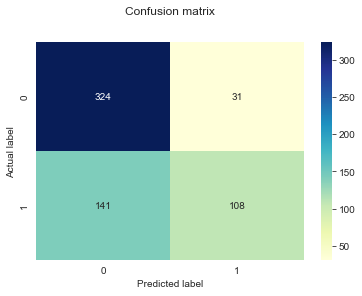

In [19]:
'''  Calcular la matriz de confusión '''
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')